In [1]:
import pandas as pd
from oversampling_binary import split_dataset, apply_smote, train_random_forest, rf_plot_confusion_matrices, train_svm, svm_plot_confusion_matrices, lightgbm_plot_confusion_matrices, train_lightgbm



# CLASIFICAZIONE BINARIA

In [2]:
# Caricare il dataset e applicare lo split
csv_file_path = 'C:/underwater-classification/features_extraction/audio_features.csv'

In [3]:
# Carica il file CSV in un DataFrame
df = pd.read_csv(csv_file_path)

In [4]:
df['File Name'] = df['File Name'].str[:-4]
df

,File Name,Class,Subclass,Spectral Centroid Mean,Spectral Bandwidth RMS,Standard Deviation,Skewness,Kurtosis,Shannon Entropy,Renyi Entropy,Rate of Attack,Rate of Decay,Threshold Crossings,Silence Ratio,Mean,Max Over Mean,Min Over Mean,Energy Measurements
0,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg1,Non-Target,Ambient Noise,2585.774150,3545.441382,0.226857,0.290663,0.892096,4.972139,-5.535674,376.987654,0.003933,4596,0.611758,-0.034153,-21.482748,23.621908,0.052631
1,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg2,Non-Target,Ambient Noise,3004.490961,3774.635411,0.108625,-0.005662,-0.569438,5.162510,-6.898534,388.414286,0.003898,4892,0.634714,-0.032923,-9.492707,10.171222,0.012883
2,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg3,Non-Target,Ambient Noise,2374.518939,3489.082003,0.247894,-0.276421,0.685544,4.945729,-5.216699,354.935065,0.003911,2814,0.576922,-0.030692,-25.133602,32.582104,0.062393
3,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg4,Non-Target,Ambient Noise,2821.144296,3698.989681,0.156887,0.579543,1.394184,4.977810,-6.245069,351.652174,0.003900,3842,0.676630,-0.033124,-17.890182,14.250049,0.025711
4,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg5,Non-Target,Ambient Noise,2649.515257,3629.187032,0.182234,-0.088010,-0.083039,5.108433,-5.868417,360.301370,0.003938,4086,0.587979,-0.031081,-16.133920,20.697605,0.034175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50988,ship_small_seg5,Target,Vessel,456.747011,797.837269,0.194804,0.013841,0.040806,4.912163,-5.505589,374.087500,0.004186,3257,0.502427,0.010898,67.170630,-71.718500,0.038067
50989,ship_small_seg6,Target,Vessel,452.009912,804.062723,0.187102,0.015867,0.072808,4.923598,-5.597314,374.125000,0.004034,3284,0.499966,0.010380,68.853870,-69.641780,0.035115
50990,ship_small_seg7,Target,Vessel,446.388360,808.959976,0.179071,0.000758,0.094906,4.904681,-5.670921,374.100000,0.003832,3247,0.500477,0.011149,60.261180,-65.437140,0.032191
50991,ship_small_seg8,Target,Vessel,451.316540,794.817133,0.188441,-0.002943,0.136695,4.846811,-5.513616,374.087500,0.004043,3283,0.495841,0.010464,76.876610,-72.440750,0.035620


In [5]:
print("Distribuzione delle Classi prima dello split:")
print(df['Class'].value_counts())

Distribuzione delle Classi prima dello split:
Class
Target        43181
Non-Target     7812
Name: count, dtype: int64


In [6]:
df_Target = df[df['Class'] == 'Target']

print("Distribuzione delle subclass in Target prima dello split:")
print(df_Target['Subclass'].value_counts())

Distribuzione delle subclass in Target prima dello split:
Subclass
Passengership                       11728
Tanker                              11221
Tug                                 10162
Cargo                                9671
Vessel                                307
Sonar                                  20
Seismic airguns surveys                18
Seal bomb                              17
Echosounder                            14
Underwater Communication Signals        6
Scuba divers                            4
Seafloor fossil fuel processing         4
Acoustic release                        3
Acoustic Harassment Devices             2
Explosion                               2
Fishing pinger                          2
Name: count, dtype: int64


In [7]:
df_NonTarget = df[df['Class'] == 'Non-Target']

print("Distribuzione delle subclass in Non-Target prima dello split:")
print(df_NonTarget['Subclass'].value_counts())

Distribuzione delle subclass in Non-Target prima dello split:
Subclass
Humpback Whale                1523
Sperm Whale                   1107
Fin, Finback Whale             803
Pygmy Blue Whale               493
Blue whale                     280
                              ... 
Ringed Seal                      2
Australian Snubfin Dolphin       1
True_s beaked whale              1
Harbor porpoise                  1
Pygmy Right Whale                1
Name: count, Length: 96, dtype: int64


## SPLIT

In [8]:
X_train_imputed, X_val_imputed, X_test_imputed, y_train, y_val, y_test = split_dataset(df)

Dimensione totale dopo il filtraggio: 49429 campioni

Dimensione del set di addestramento: 38789 campioni (78.47%)
Dimensione del set di validazione: 5016 campioni (10.15%)
Dimensione del set di test: 5624 campioni (11.38%)

Distribuzione delle subclass nel set di addestramento:
Class
Target        33872
Non-Target     4917
Name: count, dtype: int64

Distribuzione delle subclass nel set di validazione:
Class
Target        4403
Non-Target     613
Name: count, dtype: int64

Distribuzione delle subclass nel set di test:
Class
Target        4814
Non-Target     810
Name: count, dtype: int64


In [9]:
X_train_imputed[['File Name', 'Parent', 'Class']].groupby(['Parent', 'File Name']).describe()

Class  \
                                                                                count   
Parent                               File Name                                          
1cc5583b-fe72-4cb2-b64c-563bd87ad91b 1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg1      1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg10     1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg11     1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg12     1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg13     1   
...                                                                               ...   
ship_small                           ship_small_seg5                                1   
                                     ship_small_seg6                                1   
                                     ship_small_seg7                                1   
                                     ship_small_seg8                                1   
                                     ship_small_seg9                                1   

                                                                                        \
                                                                                unique   
Parent                               File Name                                           
1cc5583b-fe72-4cb2-b64c-563bd87ad91b 1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg1       1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg10      1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg11      1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg12      1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg13      1   
...                                                                                ...   
ship_small                           ship_small_seg5                                 1   
                                     ship_small_seg6                                 1   
                                     ship_small_seg7                                 1   
                                     ship_small_seg8                                 1   
                                     ship_small_seg9                                 1   

                                                                                         \
                                                                                    top   
Parent                               File Name                                            
1cc5583b-fe72-4cb2-b64c-563bd87ad91b 1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg1   Target   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg10  Target   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg11  Target   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg12  Target   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg13  Target   
...                                                                                 ...   
ship_small                           ship_small_seg5                             Target   
                                     ship_small_seg6                             Target   
                                     ship_small_seg7                             Target   
                                     ship_small_seg8                             Target   
                                     ship_small_seg9                             Target   

                                                                                      
                                                                                freq  
Parent                               File Name                                        
1cc5583b-fe72-4cb2-b64c-563bd87ad91b

In [10]:
X_val_imputed[['File Name', 'Parent', 'Class']].groupby(['Parent', 'File Name']).describe()

Class  \
                                                                                                    count   
Parent                                           File Name                                                  
20160531-7_142749                                20160531-7_142749_seg1                                 1   
                                                 20160531-7_142749_seg10                                1   
                                                 20160531-7_142749_seg100                               1   
                                                 20160531-7_142749_seg101                               1   
                                                 20160531-7_142749_seg102                               1   
...                                                                                                   ...   
Striped-Dolphin-Whistles-PAM_20160206_015539_377 Striped-Dolphin-Whistles-PAM_20160206_015539_37...     1   
                                                 Striped-Dolphin-Whistles-PAM_20160206_015539_37...     1   
                                                 Striped-Dolphin-Whistles-PAM_20160206_015539_37...     1   
                                                 Striped-Dolphin-Whistles-PAM_20160206_015539_37...     1   
                                                 Striped-Dolphin-Whistles-PAM_20160206_015539_37...     1   

                                                                                                            \
                                                                                                    unique   
Parent                                           File Name                                                   
20160531-7_142749                                20160531-7_142749_seg1                                  1   
                                                 20160531-7_142749_seg10                                 1   
                                                 20160531-7_142749_seg100                                1   
                                                 20160531-7_142749_seg101                                1   
                                                 20160531-7_142749_seg102                                1   
...                                                                                                    ...   
Striped-Dolphin-Whistles-PAM_20160206_015539_377 Striped-Dolphin-Whistles-PAM_20160206_015539_37...      1   
                                                 Striped-Dolphin-Whistles-PAM_20160206_015539_37...      1   
                                                 Striped-Dolphin-Whistles-PAM_20160206_015539_37...      1   
                                                 Striped-Dolphin-Whistles-PAM_20160206_015539_37...      1   
                                                 Striped-Dolphin-Whistles-PAM_20160206_015539_37...      1   

                                                                                                                 \
                                                                                                            top   
Parent                                           File Name                                                        
20160531-7_142749                                20160531-7_142749_seg1                                  Target   
                                                 20160531-7_142749_seg10                                 Target   
                                                 20160531-7_142749_seg100                                Target   
                                                 20160531-7_142749_seg101                                Target   
                                                 20160531-7_142749_seg102                                Target   
...                                                                                                         ... 

In [11]:
X_test_imputed[['File Name', 'Parent', 'Class']].groupby(['Parent', 'File Name']).describe()

Class  \
                                                                               count   
Parent                               File Name                                         
20160516a-9_9                        20160516a-9_9_seg1                            1   
                                     20160516a-9_9_seg2                            1   
                                     20160516a-9_9_seg3                            1   
20160616b-21_200904                  20160616b-21_200904_seg1                      1   
                                     20160616b-21_200904_seg10                     1   
...                                                                              ...   
e60488c2-30fb-414b-bc9f-ee16f886a897 e60488c2-30fb-414b-bc9f-ee16f886a897_seg5     1   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg6     1   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg7     1   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg8     1   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg9     1   

                                                                                       \
                                                                               unique   
Parent                               File Name                                          
20160516a-9_9                        20160516a-9_9_seg1                             1   
                                     20160516a-9_9_seg2                             1   
                                     20160516a-9_9_seg3                             1   
20160616b-21_200904                  20160616b-21_200904_seg1                       1   
                                     20160616b-21_200904_seg10                      1   
...                                                                               ...   
e60488c2-30fb-414b-bc9f-ee16f886a897 e60488c2-30fb-414b-bc9f-ee16f886a897_seg5      1   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg6      1   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg7      1   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg8      1   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg9      1   

                                                                                            \
                                                                                       top   
Parent                               File Name                                               
20160516a-9_9                        20160516a-9_9_seg1                             Target   
                                     20160516a-9_9_seg2                             Target   
                                     20160516a-9_9_seg3                             Target   
20160616b-21_200904                  20160616b-21_200904_seg1                       Target   
                                     20160616b-21_200904_seg10                      Target   
...                                                                                    ...   
e60488c2-30fb-414b-bc9f-ee16f886a897 e60488c2-30fb-414b-bc9f-ee16f886a897_seg5  Non-Target   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg6  Non-Target   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg7  Non-Target   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg8  Non-Target   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg9  Non-Target   

                                                                                     
                                                                               freq  
Parent                               File Name                                       
20160516a-9_9           

## SMOTE

In [12]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Adatta questo valore al numero di core che desideri utilizzare

In [13]:
X_train_resampled, y_train_resampled = apply_smote(X_train_imputed, y_train, 1)

Distribuzione delle classi nel set di training dopo SMOTE:
1    33872
0    33872
Name: count, dtype: int64


In [14]:
# Stampare le forme dei dataset
print("\nForme dei dataset:")
print(f"Train: {X_train_imputed.shape}") #validation
print(f"Validation: {X_val_imputed.shape}") #validation
print(f"Test: {X_test_imputed.shape}") #test
print(f"Train bilanciato e filtrato: {X_train_resampled.shape}") #train dopo SMOTE


Forme dei dataset:
Train: (38789, 19)
Validation: (5016, 19)
Test: (5624, 19)
Train bilanciato e filtrato: (67744, 15)


# Esperimento 1

Esperimento effettuato prendendo come riferimento alcune features numeriche da "Malfante et al."

In [15]:
# Rimuovi le colonne non necessarie per evitare errori nei nomi delle feature
X_val_imputed = X_val_imputed.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')
X_test_imputed = X_test_imputed.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')

### 1.1 Random Forest Model

In [16]:
random_forest_model = train_random_forest(X_train_resampled, y_train_resampled, X_val_imputed, y_val, X_test_imputed, y_test)

Accuratezza sul Validation Set: 0.9920
Log Loss sul Validation Set: 0.0382

=== Report di Classificazione - Validation Set ===
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       613
           1       1.00      0.99      1.00      4403

    accuracy                           0.99      5016
   macro avg       0.97      0.99      0.98      5016
weighted avg       0.99      0.99      0.99      5016

Accuratezza sul Test Set: 0.9838
Log Loss sul Test Set: 0.0491

=== Report di Classificazione - Test Set ===
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       810
           1       0.99      0.99      0.99      4814

    accuracy                           0.98      5624
   macro avg       0.96      0.97      0.97      5624
weighted avg       0.98      0.98      0.98      5624



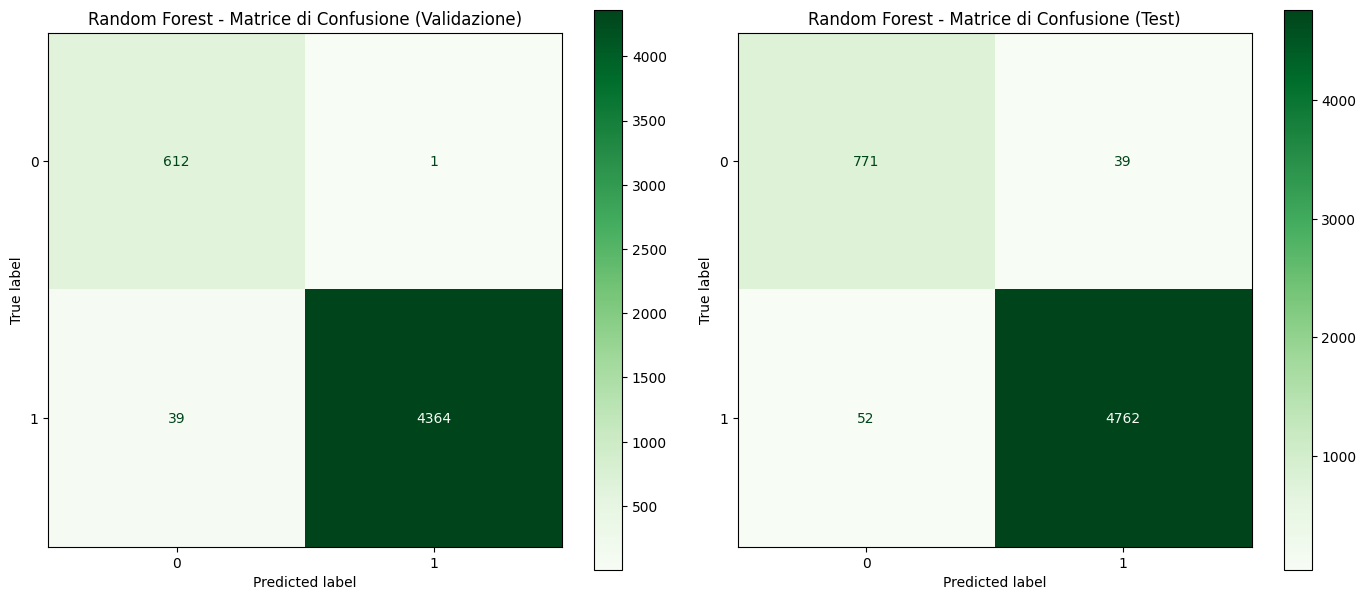

In [17]:
rf_plot_confusion_matrices(random_forest_model, X_val_imputed, y_val, X_test_imputed, y_test)

### 1.2 SVM Model

In [18]:
svm_model = train_svm(X_train_resampled, y_train_resampled, X_val_imputed, y_val, X_test_imputed, y_test)

Distribuzione delle classi reali nel set di validazione: [ 613 4403]
Distribuzione delle classi predette nel set di validazione: [ 390 4626]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0       0.70      0.45      0.55       613
           1       0.93      0.97      0.95      4403

    accuracy                           0.91      5016
   macro avg       0.81      0.71      0.75      5016
weighted avg       0.90      0.91      0.90      5016

Accuratezza sul set di validazione: 0.9093
Distribuzione delle classi reali nel set di test: [ 810 4814]
Distribuzione delle classi predette nel set di test: [ 873 4751]
Report di classificazione del set di test:
              precision    recall  f1-score   support

           0       0.70      0.75      0.72       810
           1       0.96      0.95      0.95      4814

    accuracy                           0.92      5624
   macro avg       0.83      0.85      0.84      56

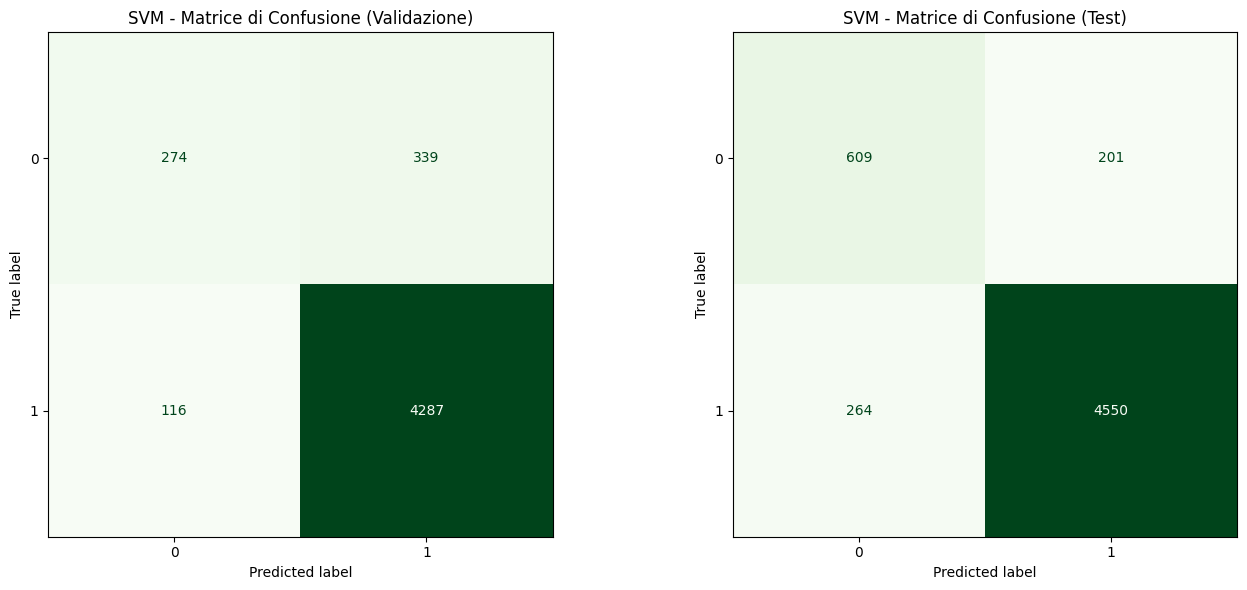

In [19]:
svm_plot_confusion_matrices(svm_model, X_val_imputed, y_val, X_test_imputed, y_test)

### 1.3 LightGBM Model

In [20]:
lightgbm_model = train_lightgbm(X_train_resampled, y_train_resampled, X_val_imputed, y_val, X_test_imputed, y_test)

Dimensioni dopo NaN nel set di addestramento: X_train: (67744, 15), y_train: (67744,)
Dimensioni dopo NaN nel set di validazione: X_val: (5016, 15), y_val: (5016,)
Dimensioni dopo NaN nel set di test: X_test: (5624, 15), y_test: (5624,)
Classi nel set di addestramento: [0 1]
Classi nel set di validazione: [0 1]
Classi nel set di test: [0 1]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       613
           1       1.00      0.99      1.00      4403

    accuracy                           0.99      5016
   macro avg       0.97      1.00      0.98      5016
weighted avg       0.99      0.99      0.99      5016

Accuratezza sul set di validazione: 0.9926
Report di classificazione del set di test:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       810
           1       0.99      1.00      0.99      4814

    accuracy                  

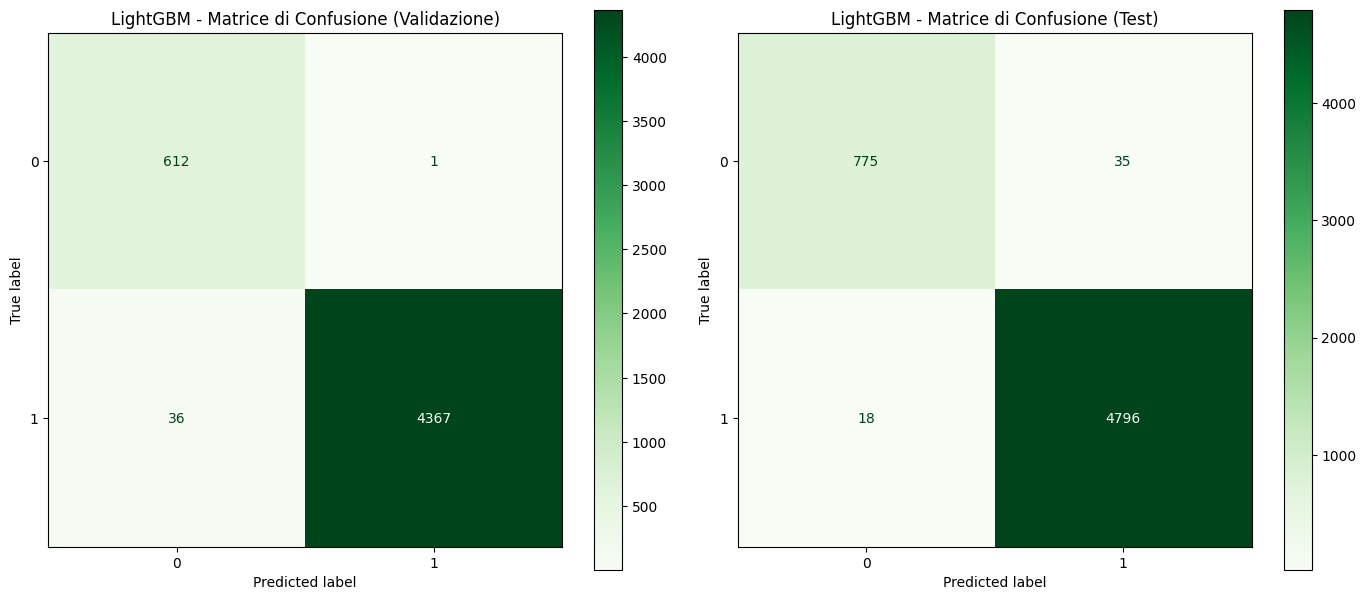

In [21]:
lightgbm_plot_confusion_matrices(lightgbm_model, X_val_imputed, y_val, X_test_imputed, y_test)

## Esperimento 2

Esperimento effettuato prendendo come riferimento alcune features numeriche da “BirdNet”

In [22]:
csv_file_path_exp1 = 'C:/underwater-classification/features_extraction/exp1_audio_features.csv'
df_exp1 = pd.read_csv(csv_file_path_exp1)

In [23]:
X_train_imputed_exp1, X_val_imputed_exp1, X_test_imputed_exp1, y_train_encoded_exp1, y_val_encoded_exp1, y_test_encoded_exp1 = split_dataset(df_exp1)

Dimensione totale dopo il filtraggio: 49429 campioni

Dimensione del set di addestramento: 38789 campioni (78.47%)
Dimensione del set di validazione: 5016 campioni (10.15%)
Dimensione del set di test: 5624 campioni (11.38%)

Distribuzione delle subclass nel set di addestramento:
Class
Target        33872
Non-Target     4917
Name: count, dtype: int64

Distribuzione delle subclass nel set di validazione:
Class
Target        4403
Non-Target     613
Name: count, dtype: int64

Distribuzione delle subclass nel set di test:
Class
Target        4814
Non-Target     810
Name: count, dtype: int64


In [24]:

X_train_resampled_exp1, y_train_resampled_exp1 = apply_smote(X_train_imputed_exp1, y_train_encoded_exp1, 1)

Distribuzione delle classi nel set di training dopo SMOTE:
1    33872
0    33872
Name: count, dtype: int64


In [25]:
# Rimuovi le colonne non necessarie per evitare errori nei nomi delle feature
X_val_imputed_exp1 = X_val_imputed_exp1.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')
X_test_imputed_exp1 = X_test_imputed_exp1.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')

### 2.1 Random Forest Model

In [26]:
random_forest_model_exp1 = train_random_forest(X_train_resampled_exp1, y_train_resampled_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)

Accuratezza sul Validation Set: 0.9880
Log Loss sul Validation Set: 0.0425

=== Report di Classificazione - Validation Set ===
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       613
           1       1.00      0.99      0.99      4403

    accuracy                           0.99      5016
   macro avg       0.96      0.99      0.97      5016
weighted avg       0.99      0.99      0.99      5016

Accuratezza sul Test Set: 0.9913
Log Loss sul Test Set: 0.0388

=== Report di Classificazione - Test Set ===
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       810
           1       1.00      0.99      0.99      4814

    accuracy                           0.99      5624
   macro avg       0.98      0.99      0.98      5624
weighted avg       0.99      0.99      0.99      5624



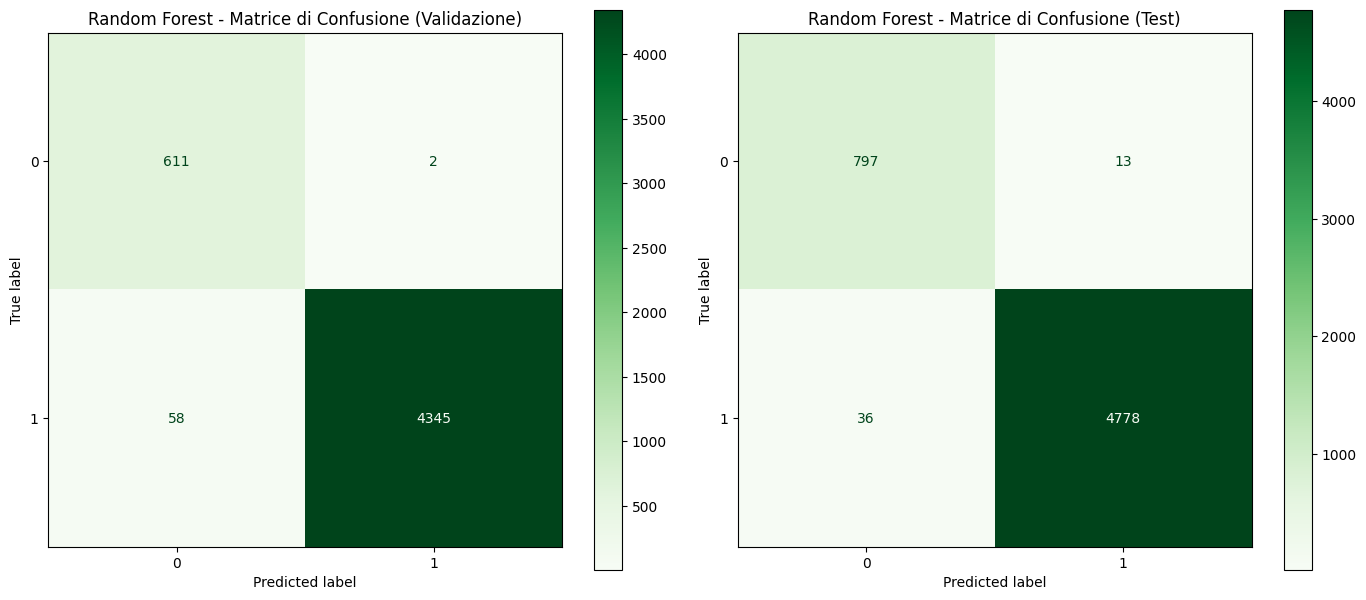

In [27]:
rf_plot_confusion_matrices(random_forest_model_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)


### 2.2 SVM Model

In [28]:
svm_model_exp1 = train_svm(X_train_resampled_exp1, y_train_resampled_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)

Distribuzione delle classi reali nel set di validazione: [ 613 4403]
Distribuzione delle classi predette nel set di validazione: [ 688 4328]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       613
           1       1.00      0.98      0.99      4403

    accuracy                           0.98      5016
   macro avg       0.93      0.98      0.95      5016
weighted avg       0.98      0.98      0.98      5016

Accuratezza sul set di validazione: 0.9795
Distribuzione delle classi reali nel set di test: [ 810 4814]
Distribuzione delle classi predette nel set di test: [1006 4618]
Report di classificazione del set di test:
              precision    recall  f1-score   support

           0       0.78      0.97      0.87       810
           1       1.00      0.95      0.97      4814

    accuracy                           0.96      5624
   macro avg       0.89      0.96      0.92      56

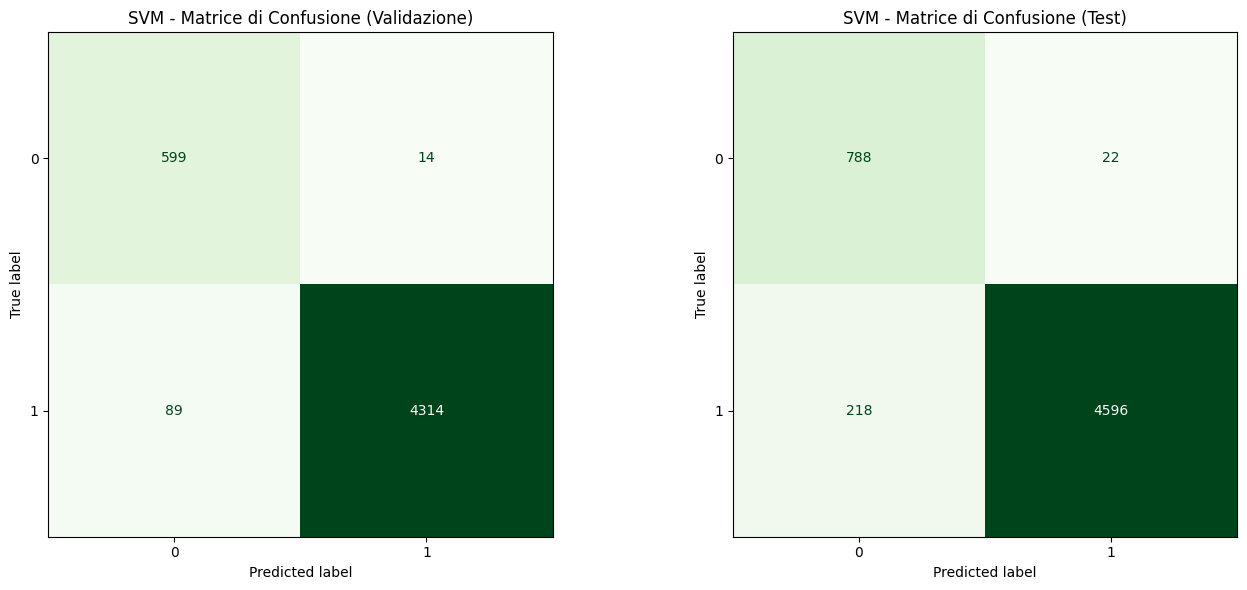

In [29]:
svm_plot_confusion_matrices(svm_model_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)

### 2.3 LightGBM Model

In [30]:
lightgbm_model_exp1 = train_lightgbm(X_train_resampled_exp1, y_train_resampled_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)

Dimensioni dopo NaN nel set di addestramento: X_train: (67744, 28), y_train: (67744,)
Dimensioni dopo NaN nel set di validazione: X_val: (5016, 28), y_val: (5016,)
Dimensioni dopo NaN nel set di test: X_test: (5624, 28), y_test: (5624,)
Classi nel set di addestramento: [0 1]
Classi nel set di validazione: [0 1]
Classi nel set di test: [0 1]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       613
           1       1.00      0.99      1.00      4403

    accuracy                           0.99      5016
   macro avg       0.98      1.00      0.99      5016
weighted avg       0.99      0.99      0.99      5016

Accuratezza sul set di validazione: 0.9940
Report di classificazione del set di test:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       810
           1       1.00      1.00      1.00      4814

    accuracy                  

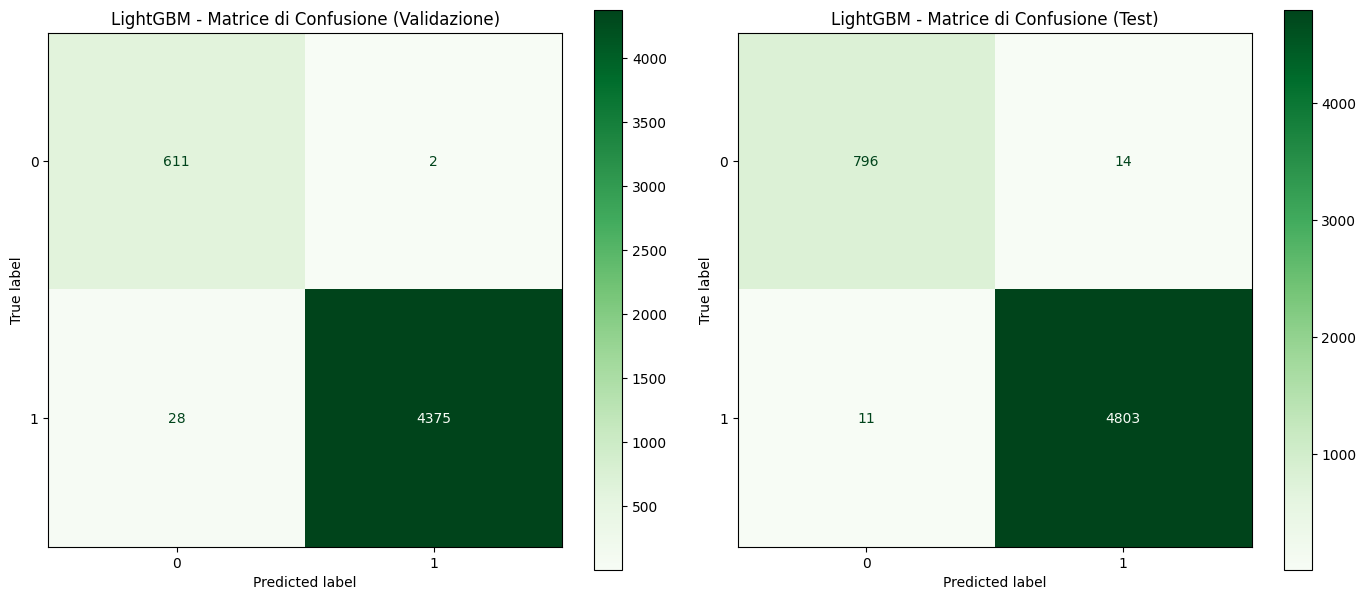

In [31]:
lightgbm_plot_confusion_matrices(lightgbm_model_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)

## Esperimento 3

Esperimento effettuato prendendo come riferimento features numeriche da "A Survey on Audio Feature Extraction for Automatic Music Genre Classification" di Dhamodaran et al.

In [32]:
csv_file_path_exp2 = 'C:/underwater-classification/features_extraction/exp2_audio_features.csv'
df_exp2 = pd.read_csv(csv_file_path_exp2)

In [33]:
X_train_imputed_exp2, X_val_imputed_exp2, X_test_imputed_exp2, y_train_encoded_exp2, y_val_encoded_exp2, y_test_encoded_exp2 = split_dataset(df_exp2)

Dimensione totale dopo il filtraggio: 49429 campioni

Dimensione del set di addestramento: 38789 campioni (78.47%)
Dimensione del set di validazione: 5016 campioni (10.15%)
Dimensione del set di test: 5624 campioni (11.38%)

Distribuzione delle subclass nel set di addestramento:
Class
Target        33872
Non-Target     4917
Name: count, dtype: int64

Distribuzione delle subclass nel set di validazione:
Class
Target        4403
Non-Target     613
Name: count, dtype: int64

Distribuzione delle subclass nel set di test:
Class
Target        4814
Non-Target     810
Name: count, dtype: int64


In [34]:

X_train_resampled_exp2, y_train_resampled_exp2 = apply_smote(X_train_imputed_exp2, y_train_encoded_exp2, 1)

Distribuzione delle classi nel set di training dopo SMOTE:
1    33872
0    33872
Name: count, dtype: int64


In [35]:
# Rimuovi le colonne non necessarie per evitare errori nei nomi delle feature
X_val_imputed_exp2 = X_val_imputed_exp2.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')
X_test_imputed_exp2 = X_test_imputed_exp2.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')

### 3.1 Random Forest Model

In [36]:
random_forest_model_exp2 = train_random_forest(X_train_resampled_exp2, y_train_resampled_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)

Accuratezza sul Validation Set: 0.9868
Log Loss sul Validation Set: 0.0449

=== Report di Classificazione - Validation Set ===
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       613
           1       1.00      0.99      0.99      4403

    accuracy                           0.99      5016
   macro avg       0.95      0.99      0.97      5016
weighted avg       0.99      0.99      0.99      5016

Accuratezza sul Test Set: 0.9899
Log Loss sul Test Set: 0.0421

=== Report di Classificazione - Test Set ===
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       810
           1       1.00      0.99      0.99      4814

    accuracy                           0.99      5624
   macro avg       0.97      0.99      0.98      5624
weighted avg       0.99      0.99      0.99      5624



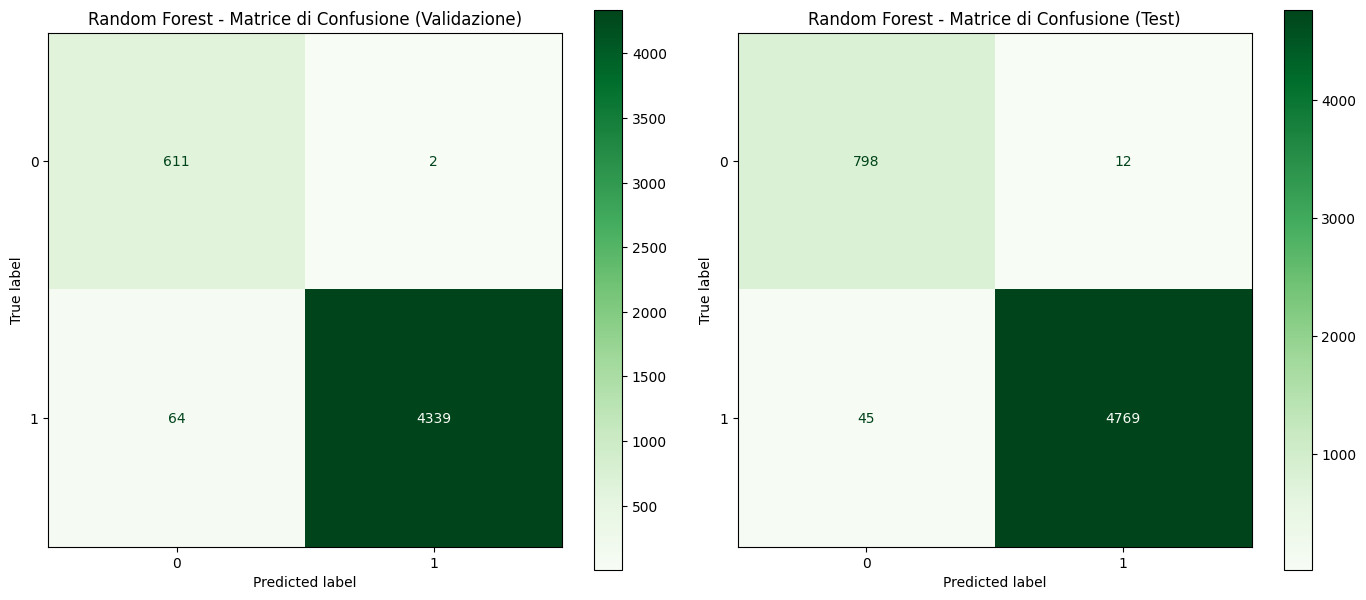

In [37]:
rf_plot_confusion_matrices(random_forest_model_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)

### 3.2 SVM Model 

In [38]:
svm_model_exp2 = train_svm(X_train_resampled_exp2, y_train_resampled_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)

Distribuzione delle classi reali nel set di validazione: [ 613 4403]
Distribuzione delle classi predette nel set di validazione: [ 672 4344]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       613
           1       1.00      0.99      0.99      4403

    accuracy                           0.99      5016
   macro avg       0.95      0.99      0.97      5016
weighted avg       0.99      0.99      0.99      5016

Accuratezza sul set di validazione: 0.9862
Distribuzione delle classi reali nel set di test: [ 810 4814]
Distribuzione delle classi predette nel set di test: [ 851 4773]
Report di classificazione del set di test:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       810
           1       1.00      0.99      0.99      4814

    accuracy                           0.99      5624
   macro avg       0.96      0.98      0.97      56

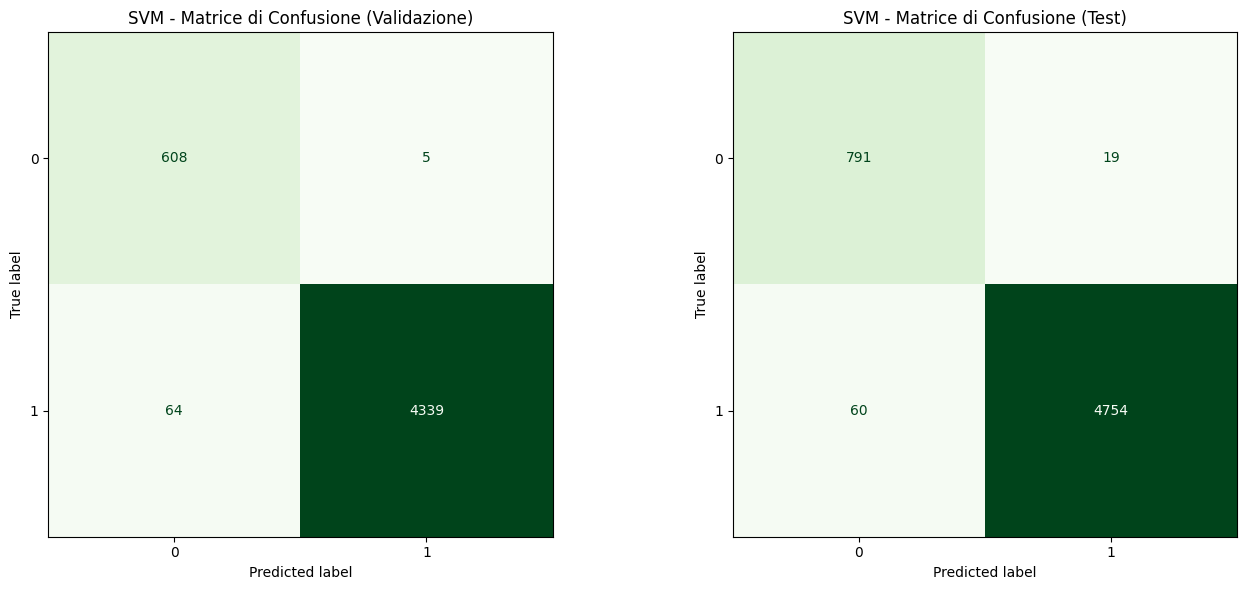

In [39]:
svm_plot_confusion_matrices(svm_model_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)

3.3 LightGBM Model

In [40]:
lightgbm_model_exp2 = train_lightgbm(X_train_resampled_exp2, y_train_resampled_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)

Dimensioni dopo NaN nel set di addestramento: X_train: (67744, 34), y_train: (67744,)
Dimensioni dopo NaN nel set di validazione: X_val: (5016, 34), y_val: (5016,)
Dimensioni dopo NaN nel set di test: X_test: (5624, 34), y_test: (5624,)
Classi nel set di addestramento: [0 1]
Classi nel set di validazione: [0 1]
Classi nel set di test: [0 1]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       613
           1       1.00      0.99      1.00      4403

    accuracy                           0.99      5016
   macro avg       0.97      0.99      0.98      5016
weighted avg       0.99      0.99      0.99      5016

Accuratezza sul set di validazione: 0.9914
Report di classificazione del set di test:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       810
           1       1.00      1.00      1.00      4814

    accuracy                  

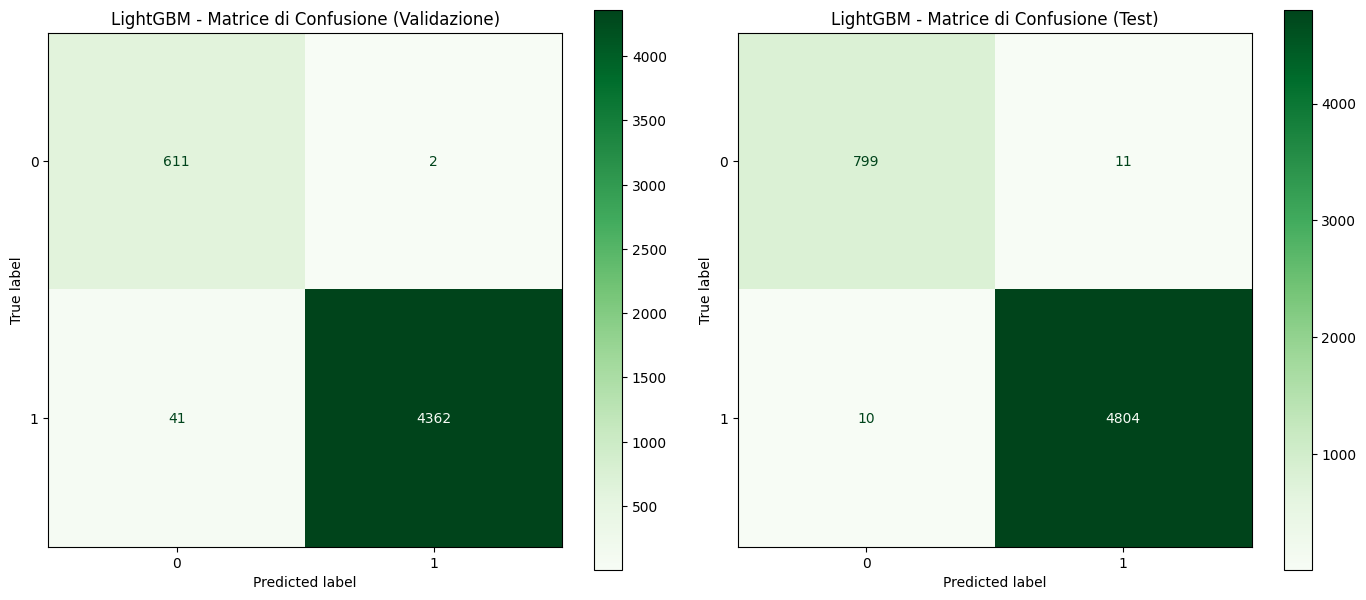

In [41]:
lightgbm_plot_confusion_matrices(lightgbm_model_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)